In [1]:
import pandas as pd
# Load the DataFrame from the .CSV file
patients_data = pd.read_csv('diabetes.csv')

In [2]:
# a-1) overal structure of the data
# Display the information about the dataset
print(patients_data.info())
# Show descriptive statistics
print(patients_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None
       Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count   635.000000   654.000000     680.000000     624.000000  680.000000   
mean      3.700787   113.422018      68.786765      20.386218   80.123529   
std 

In [3]:
# a-2) missing values
missing_values_count = patients_data.isna().sum()
total_rows = len(patients_data)
missing_values_portion = (missing_values_count / total_rows)*100

print("Number of Missing Values per Column:")
print(missing_values_count)
print("\nPortion of Missing Values per Column (%)")
print(missing_values_portion)

Number of Missing Values per Column:
Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64

Portion of Missing Values per Column (%)
Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64


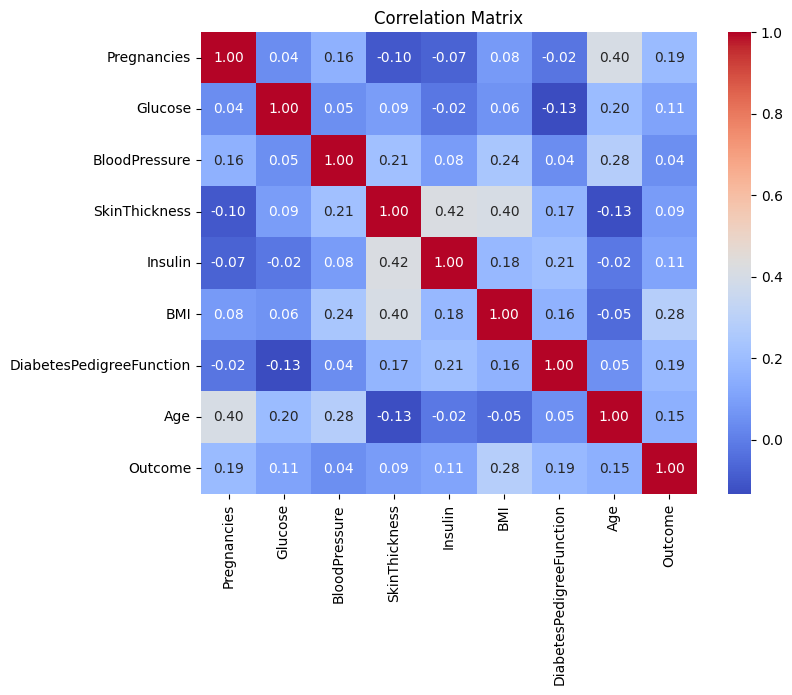

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# a-3) correlation matrix
correlation_matrix = patients_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

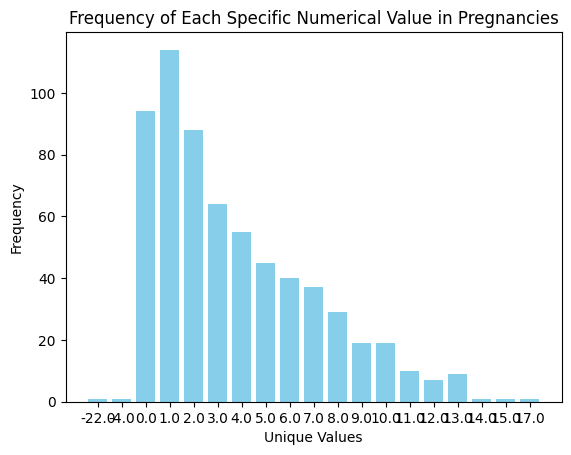

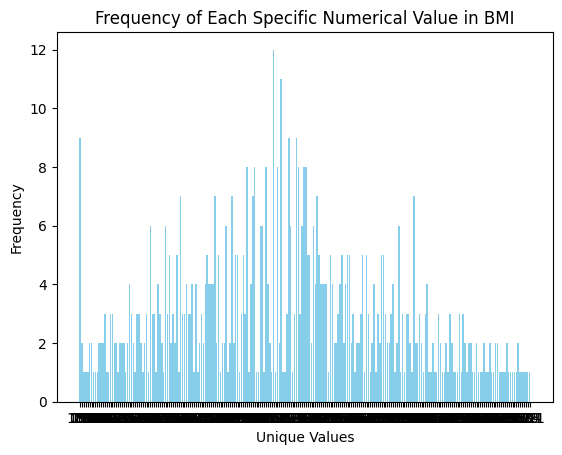

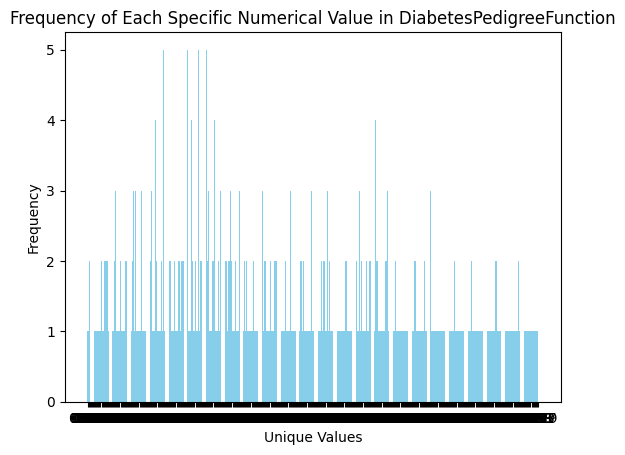

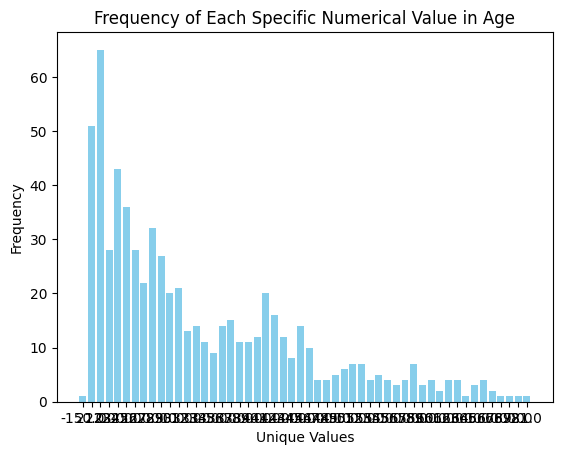

In [5]:
# a-4) Observations
# Specifing the columns of interest
cols = ['Pregnancies', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creating figures for each column
for column in cols:
    plt.figure()
    value_counts = patients_data[column].value_counts().sort_index()

    plt.bar(value_counts.index.astype(str),
            value_counts.values, color='skyblue')
    plt.title(f'Frequency of Each Specific Numerical Value in {column}')
    plt.xlabel('Unique Values')
    plt.ylabel('Frequency')
    plt.show()
    print("\n")

In [ ]:
# Histogram

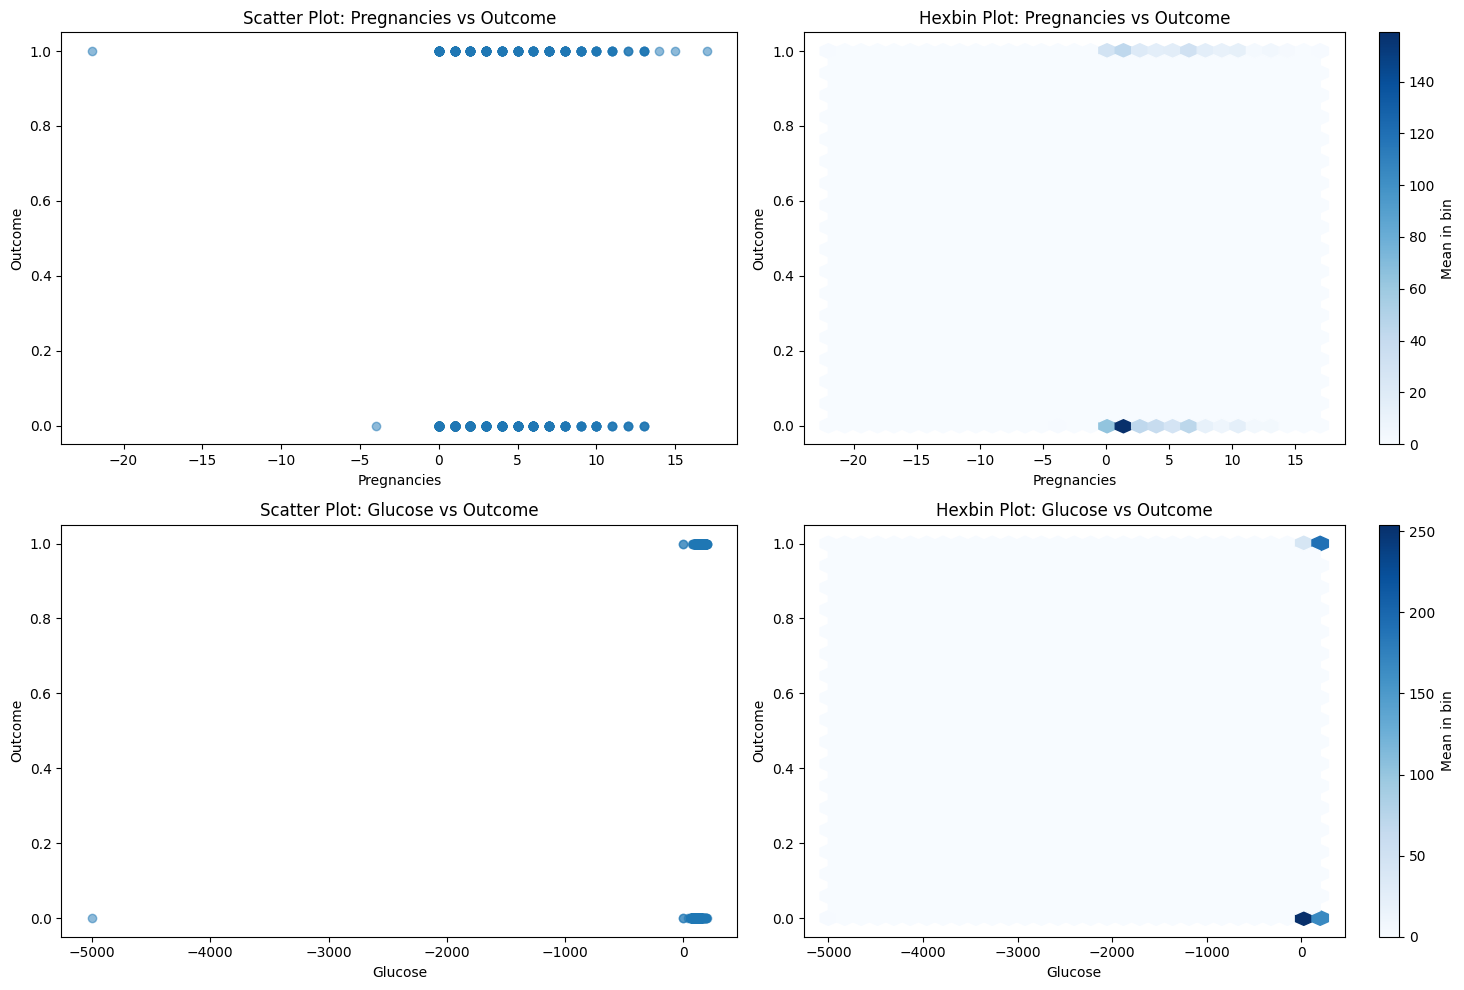

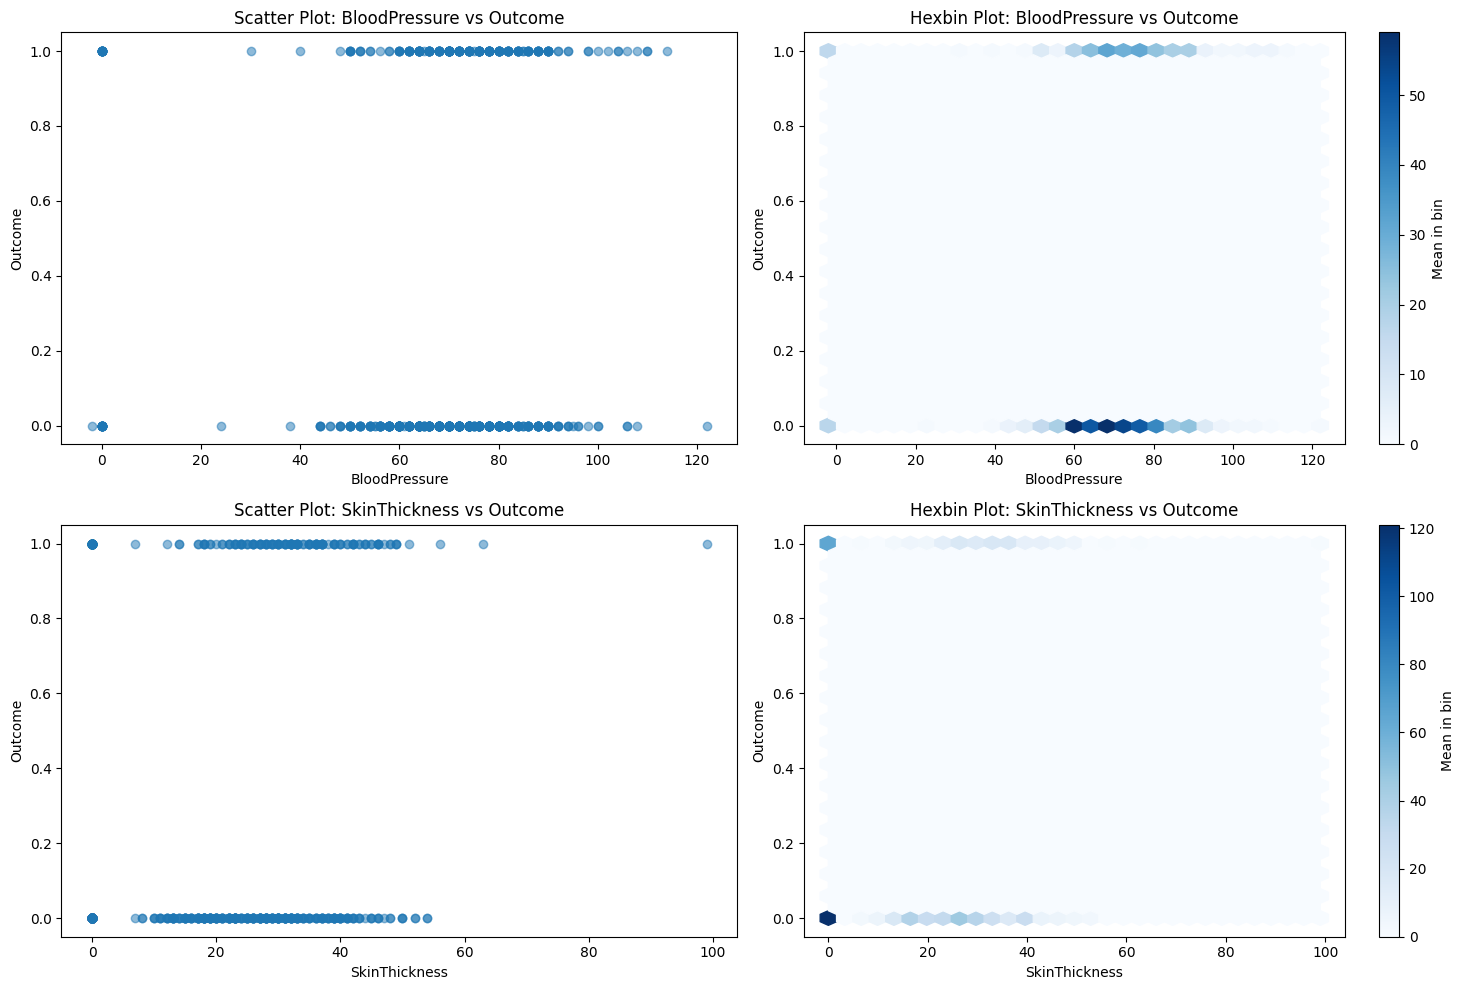

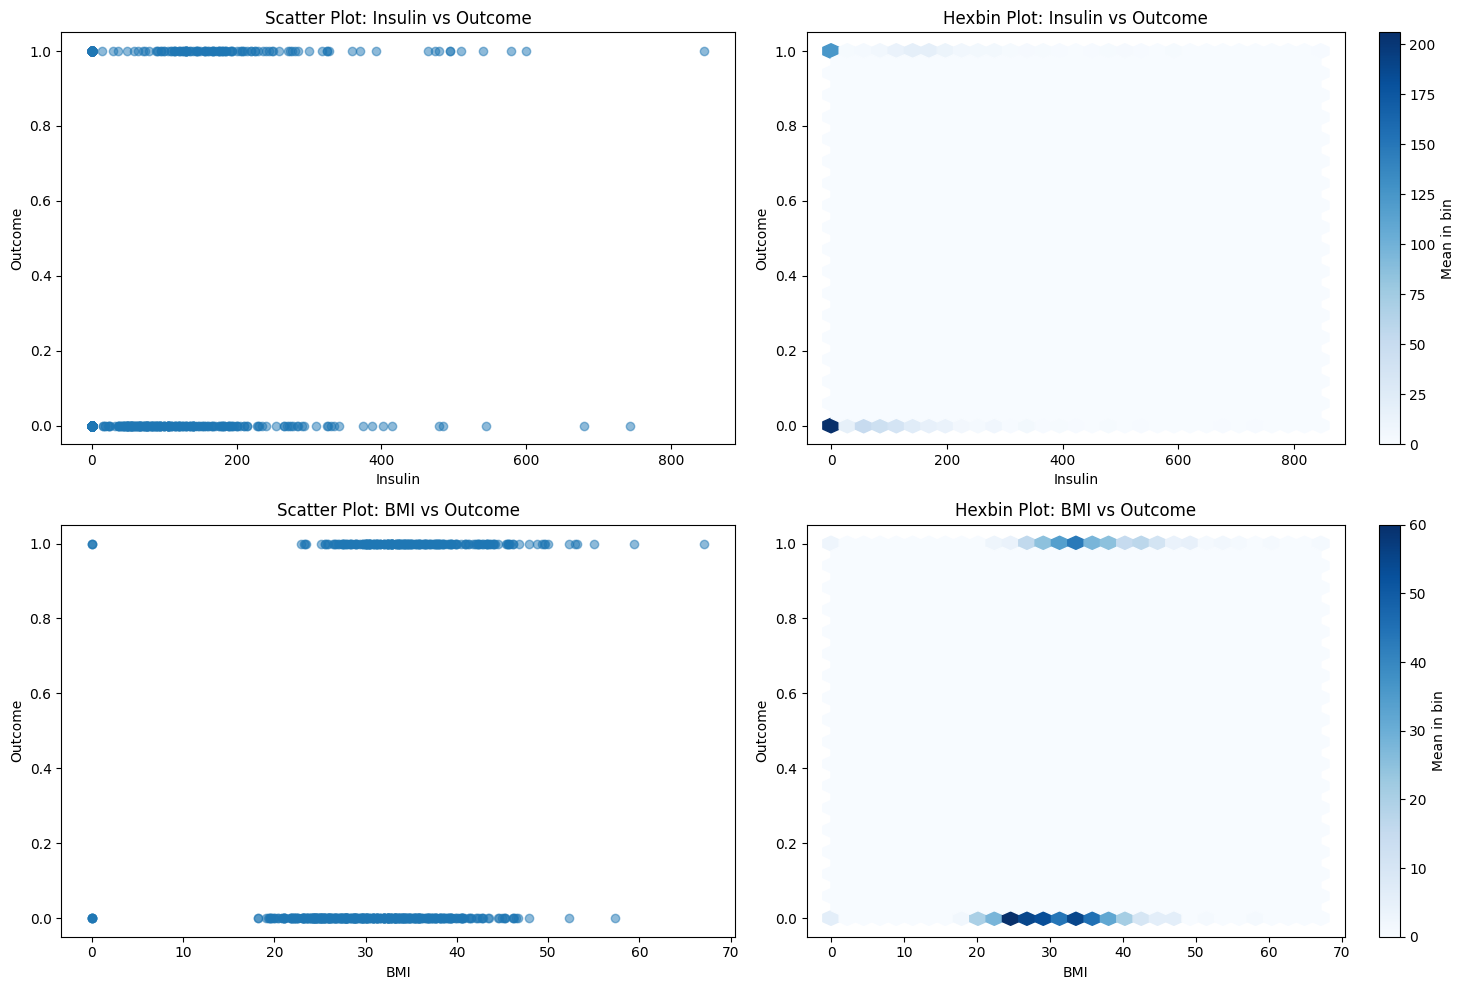

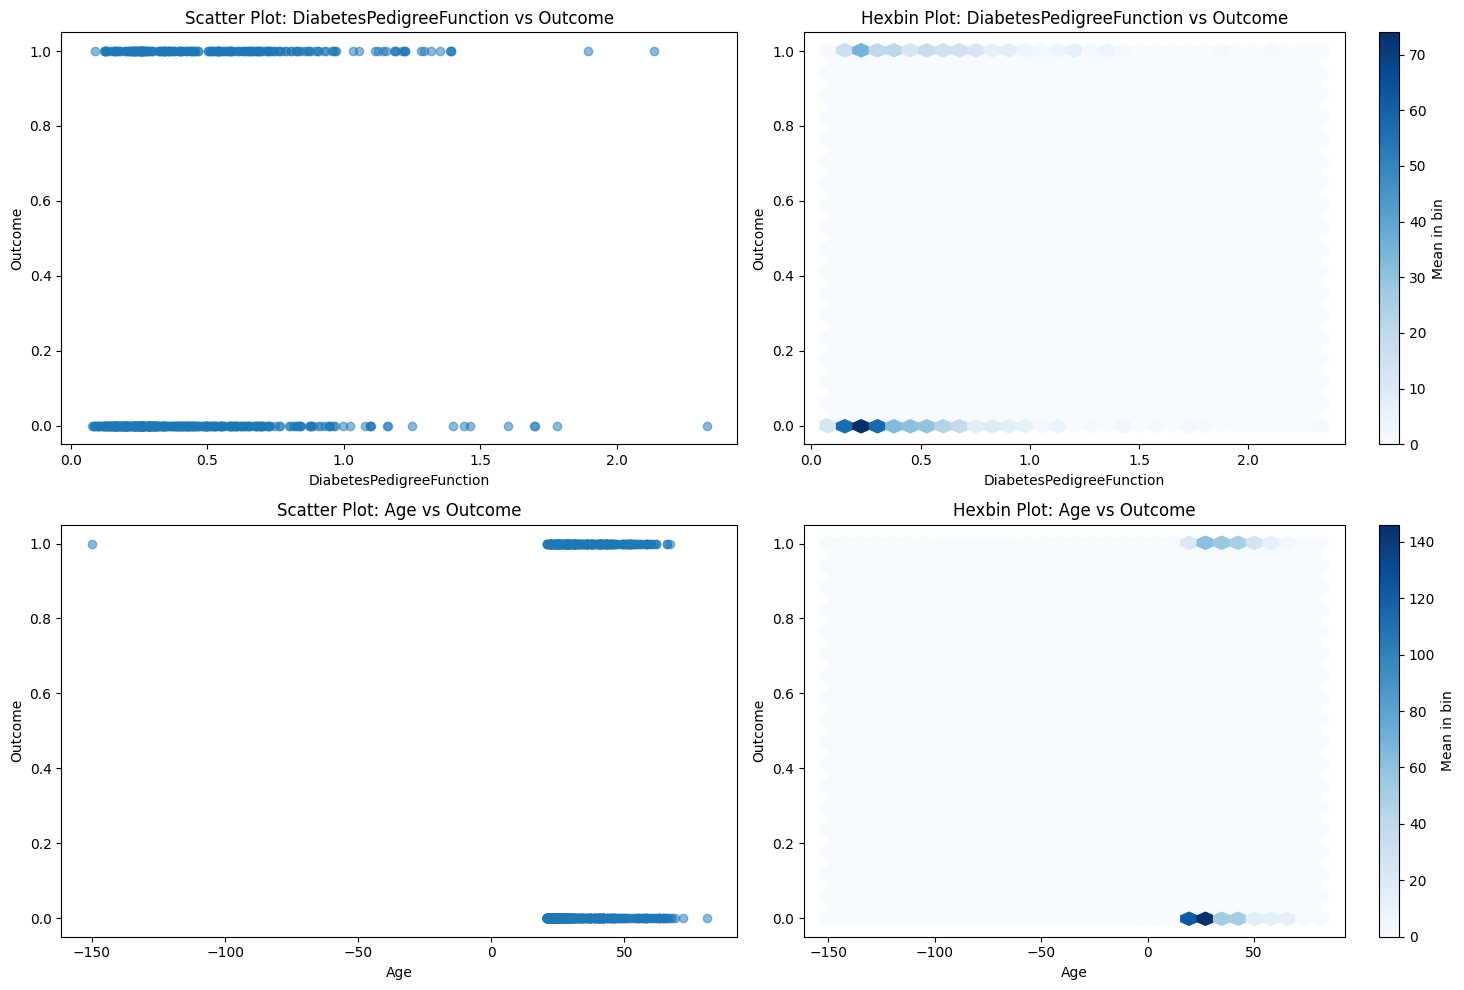

In [6]:
import numpy as np
# a - 5) scatter and hexbin
features = patients_data.columns.tolist()
outcome = 'Outcome'
features.remove(outcome)
# Create a figure for each pair of features
for i in range(0, len(features), 2):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()

    # Assign each subplot a specific plot
    for j in range(4):
        ax = axs[j]
        if j % 2 == 0:  # Even index: scatter plot
            feature = features[i + j // 2]
            ax.scatter(patients_data[feature],
                       patients_data[outcome], alpha=0.5)
            ax.set_title(f'Scatter Plot: {feature} vs {outcome}')
        else:  # Odd index: hexbin plot
            feature = features[i + (j - 1) // 2]
            hb = ax.hexbin(patients_data[feature], patients_data[outcome],
                           gridsize=30, cmap='Blues', reduce_C_function=np.mean)
            fig.colorbar(hb, ax=ax, orientation='vertical',
                         label='Mean in bin')
            ax.set_title(f'Hexbin Plot: {feature} vs {outcome}')

        ax.set_xlabel(feature)
        ax.set_ylabel(outcome)

    plt.tight_layout()
    plt.show()
    print("\n")

In [7]:
# b-1) missing values
# outliers and unacceptable value

def adjust_values(x):
    if x <= 0:
        return np.nan
    else:
        return x

patients_data.iloc[:, :8] = patients_data.iloc[:, :8].applymap(adjust_values)
missing_values_count = patients_data.isna().sum()

In [8]:
# drop columns
columns_to_drop = ['Insulin', 'SkinThickness']
for column in columns_to_drop:
    patients_data.drop(column, axis=1, inplace=True)

In [9]:
features = patients_data.columns.tolist()
features.remove(outcome)
# print(features)
# imputaion with indicator variable
for feature in features:
    patients_data[feature + '_missing'] = patients_data[feature].isna()

    median_value = patients_data[feature].median()
    mean_value = patients_data[feature].mean()
    # print(f"{feature} -> mean : {mean_value:.2f}, median : {median_value:.2f}")
    patients_data[feature] = patients_data[feature].fillna(median_value)

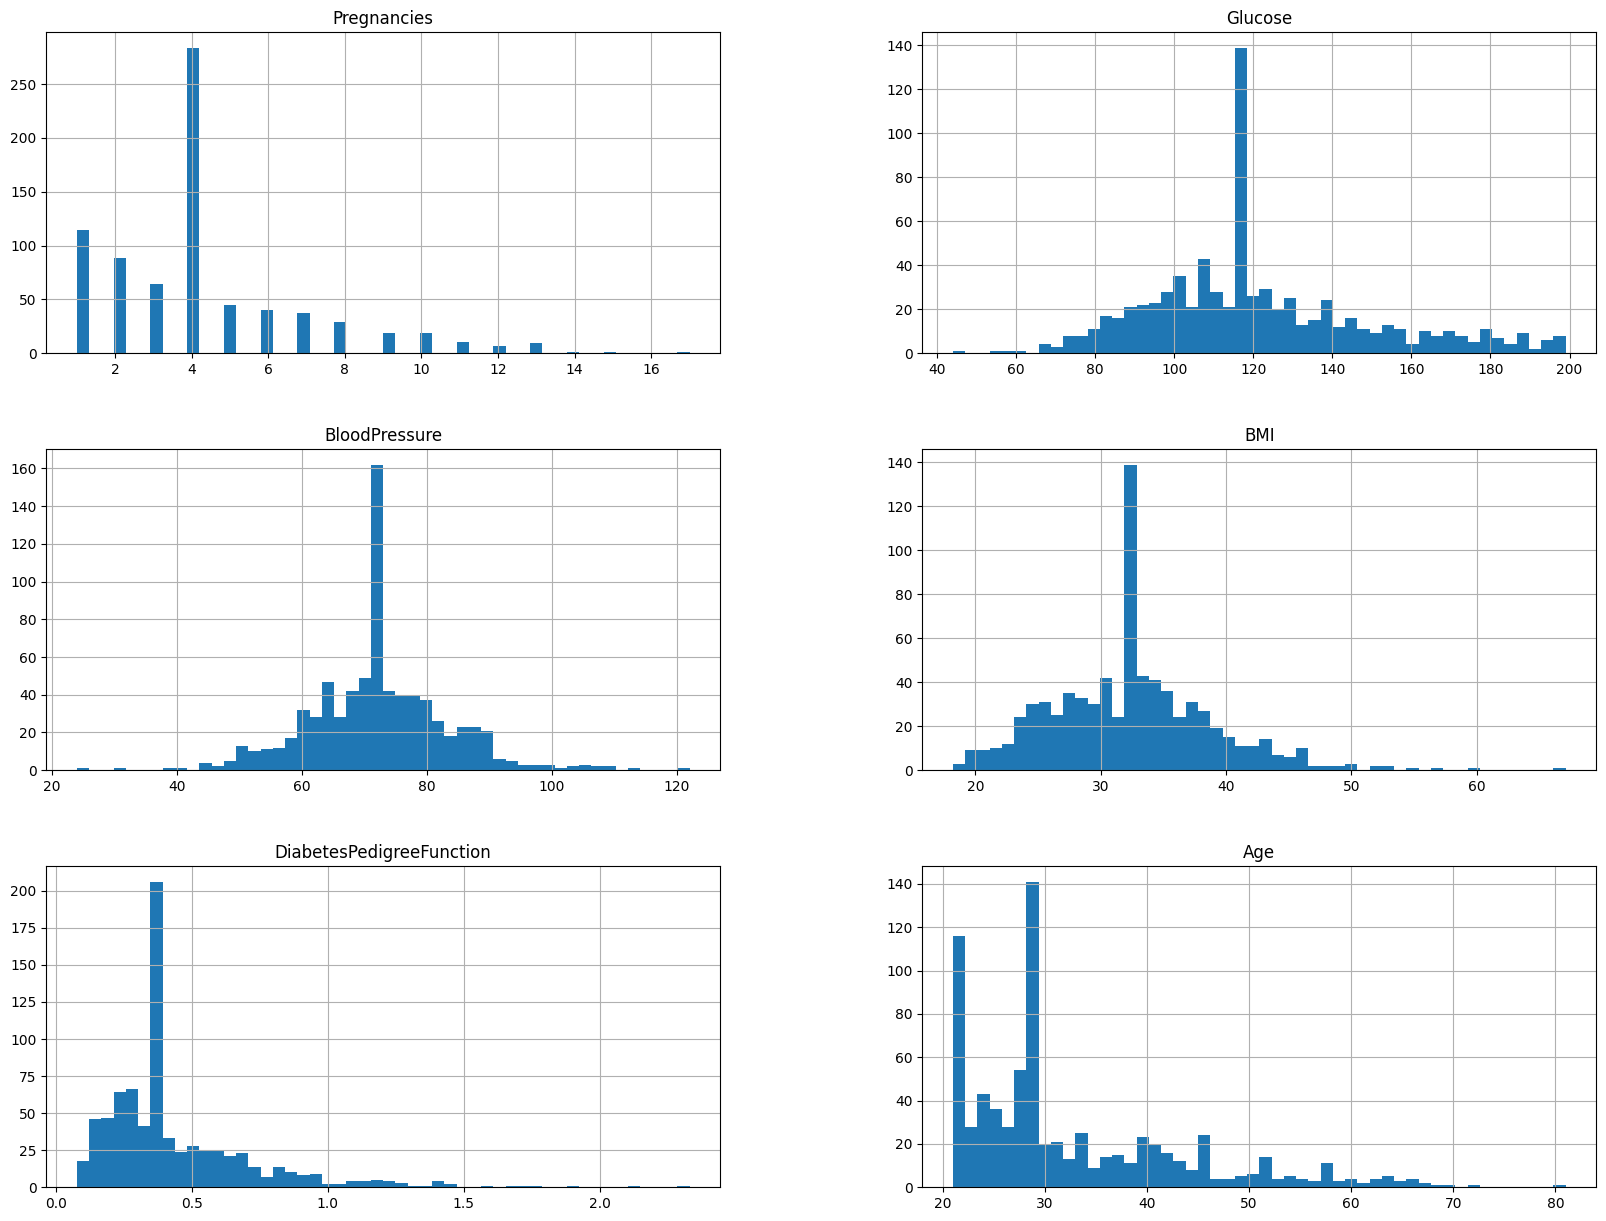

In [10]:
# b - 2)
# Data Distribution
patients_data[features].hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
from scipy.stats import shapiro
# Statistical Test for Normality
for column in patients_data.columns:
    stat, p = shapiro(patients_data[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"{column} : Data looks Gaussian, p = {p}")
    else:
        print(f"{column} : Data does not look Gaussian, p = {p}")

Pregnancies : Data does not look Gaussian, p = 8.315007106928574e-25
Glucose : Data does not look Gaussian, p = 1.15649304640187e-14
BloodPressure : Data does not look Gaussian, p = 1.483960870851675e-10
BMI : Data does not look Gaussian, p = 1.614577568864739e-11
DiabetesPedigreeFunction : Data does not look Gaussian, p = 1.2984571536810134e-29
Age : Data does not look Gaussian, p = 1.0173456533628524e-25
Outcome : Data does not look Gaussian, p = 1.2922618893873923e-38
Pregnancies_missing : Data does not look Gaussian, p = 1.4442874986133738e-39
Glucose_missing : Data does not look Gaussian, p = 1.0930128021733573e-43
BloodPressure_missing : Data does not look Gaussian, p = 1.3592595103950726e-43
BMI_missing : Data does not look Gaussian, p = 5.605193857299268e-45
DiabetesPedigreeFunction_missing : Data does not look Gaussian, p = 3.300338143177809e-41
Age_missing : Data does not look Gaussian, p = 6.305843089461677e-44


In [12]:
decisions = {}
for column in patients_data.columns:
    stat, p = shapiro(patients_data[column].dropna())
    if p > 0.05 and patients_data[column].min() >= 0:
        decisions[column] = 'Standardize'
    elif patients_data[column].min() < 0 or patients_data[column].max() > 1:
        decisions[column] = 'Normalize'
    else:
        decisions[column] = 'None needed'

print(decisions)

{'Pregnancies': 'Normalize', 'Glucose': 'Normalize', 'BloodPressure': 'Normalize', 'BMI': 'Normalize', 'DiabetesPedigreeFunction': 'Normalize', 'Age': 'Normalize', 'Outcome': 'None needed', 'Pregnancies_missing': 'None needed', 'Glucose_missing': 'None needed', 'BloodPressure_missing': 'None needed', 'BMI_missing': 'None needed', 'DiabetesPedigreeFunction_missing': 'None needed', 'Age_missing': 'None needed'}


In [13]:
from sklearn.preprocessing import MinMaxScaler
# normalize
features_to_normalize = patients_data[[
    'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_to_normalize)
patients_data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
               'DiabetesPedigreeFunction', 'Age']] = normalized_features

patients_data.to_csv('normalized_data.csv', index=False)

In [14]:
from sklearn.model_selection import train_test_split
# c - 1, 2)
X = patients_data.iloc[:, :-1]
Y = patients_data.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the Models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# train the models
for name, model in models.items():
    model.fit(X_train, Y_train)
# Evaluate
results = {}
for name, model in models.items():
    # Predict on the testing set
    Y_pred = model.predict(X_test)
    # Calculate confusion matrix and accuracy
    cm = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    # Store results in the dictionary
    results[name] = {'Confusion Matrix': cm, 'Accuracy': accuracy}
    # Print results
    print(f"\n{name}:")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy : {100*accuracy:.2f}%")



Logistic Regression:
Confusion Matrix:
[[127   0]
 [ 27   0]]
Accuracy : 82.47%

K-Nearest Neighbors:
Confusion Matrix:
[[123   4]
 [ 26   1]]
Accuracy : 80.52%

Decision Tree:
Confusion Matrix:
[[121   6]
 [  9  18]]
Accuracy : 90.26%

Random Forest:
Confusion Matrix:
[[120   7]
 [  7  20]]
Accuracy : 90.91%

Support Vector Machine:
Confusion Matrix:
[[127   0]
 [ 27   0]]
Accuracy : 82.47%


In [16]:
# Initialize the Models 2
models = {
    "Logistic Regression": LogisticRegression(max_iter=300, penalty='l2'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_features=0.5),
    "Support Vector Machine": SVC(kernel='linear', degree=4)
}

# train the models
for name, model in models.items():
    model.fit(X_train, Y_train)
    # print(f"{name} trained!")


# Evaluate
results = {}

for name, model in models.items():
    # Predict on the testing set
    Y_pred = model.predict(X_test)

    # Calculate confusion matrix and accuracy
    cm = confusion_matrix(Y_test, Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)

    # Store results in the dictionary
    results[name] = {'Confusion Matrix': cm, 'Accuracy': accuracy}

    # Print results
    print(f"\n{name}:")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy : {100*accuracy:.2f}%")


Logistic Regression:
Confusion Matrix:
[[127   0]
 [ 27   0]]
Accuracy : 82.47%

K-Nearest Neighbors:
Confusion Matrix:
[[124   3]
 [ 26   1]]
Accuracy : 81.17%

Decision Tree:
Confusion Matrix:
[[118   9]
 [  0  27]]
Accuracy : 94.16%

Random Forest:
Confusion Matrix:
[[118   9]
 [  4  23]]
Accuracy : 91.56%

Support Vector Machine:
Confusion Matrix:
[[127   0]
 [ 27   0]]
Accuracy : 82.47%


In [17]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV
# LR
param_grid = [
    {'solver': ['liblinear'], 'penalty': [
        'l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2', None], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7]},
    {'solver': ['saga', 'lbfgs', 'newton-cg'],
        'penalty': [None], 'C': [0.01, 0.1, 1, 10, 100]}
]
# Set up the model and GridSearchCV parameters
model = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)
# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# Evaluate the best model on the test data
# Predict on the test data using the best model
Y_pred = grid_search.best_estimator_.predict(X_test)
acc = 100*accuracy_score(Y_test, Y_pred)
print(f"Test accuracy: {acc:.2f}%")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, verbose=0, n_jobs=-1, scoring='accuracy', error_score='raise')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.86
Test accuracy: 82.47%


In [18]:
# KNN
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2]  # 1 for manhattan, 2 for euclidean/minkowski
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, Y_train)
print("Best parameters found: ", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_
# Evaluate the best model on the test data
Y_pred = best_knn.predict(X_test)
acc = 100*accuracy_score(Y_test, Y_pred)
print(f"Test accuracy: {acc:.2f}%")

Best parameters found:  {'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Test accuracy: 81.82%


In [19]:
# Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 3, 10, 20, 30, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dt, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, Y_train)
print("Best parameters found: ", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_
# Predict on the test data using the best model
Y_pred = best_dt.predict(X_test)
acc = 100*accuracy_score(Y_test, Y_pred)
print(f"Test accuracy: {acc:.2f}%")

Best parameters found:  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy: 94.16%


In [20]:
# RF
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    # Function to measure the quality of a split
    'criterion': ['gini', 'entropy'],
    # Maximum number of levels in each decision tree
    'max_depth': [None, 10, 20, 30],
    # Minimum number of data points placed in a node before the node is split
    'min_samples_split': [2, 10, 20],
    # Minimum number of data points allowed in a leaf node
    'min_samples_leaf': [1, 5, 10],
    # Number of features to consider when looking for the best split
    'max_features': ['sqrt', 'log2'],
    # Method for sampling data points (with or without replacement)
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, Y_train)
print("Best parameters found: ", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
# Evaluating the best model on the test data
Y_pred = best_rf.predict(X_test)
acc = 100*accuracy_score(Y_test, Y_pred)
print(f"Test accuracy: {acc:.2f}%")

Best parameters found:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
Test accuracy: 92.21%


In [21]:
# SVM
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 10, 100],  # Regularization parameter
    # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'gamma': [0.1, 0.5, 1, 5, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']  # Type of SVM kernel
}
svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(
    estimator=svm, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, Y_train)
print("Best parameters found: ", grid_search_svm.best_params_)
best_svm = grid_search_svm.best_estimator_
# Predict on the test data using the best model
Y_pred = best_svm.predict(X_test)
acc = 100*accuracy_score(Y_test, Y_pred)
print(f"Test accuracy: {acc:.2f}%")

Best parameters found:  {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Test accuracy: 82.47%


In [31]:
from sklearn.metrics import classification_report
# c-4)

dt_pred = best_dt.predict(X_test)
rf_pred = best_rf.predict(X_test)

acc_dt = 100*accuracy_score(Y_test, dt_pred)
acc_rf = 100*accuracy_score(Y_test, rf_pred)
print(f"Decision Tree Accuracy: {acc_dt:.2f}%")
print(f"Random Forest Accuracy: {acc_rf:.2f}%")
print("\nDecision Tree Classification Report:\n",
      classification_report(Y_test, dt_pred))
print("\nRandom Forest Classification Report:\n",
      classification_report(Y_test, rf_pred))

Decision Tree Accuracy: 95.65%
Random Forest Accuracy: 96.52%

Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.95      0.97        98
        True       0.77      1.00      0.87        17

    accuracy                           0.96       115
   macro avg       0.89      0.97      0.92       115
weighted avg       0.97      0.96      0.96       115


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98        98
        True       0.88      0.88      0.88        17

    accuracy                           0.97       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.97      0.97      0.97       115



In [23]:
# c - 5)
# Check overfitting
models = {
    "Logistic Regression": LogisticRegression(C=0.01, penalty='l1', solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(leaf_size=30, metric='manhattan', n_neighbors=10, p=1, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2),
    "Random Forest": RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=20, n_estimators=100),
    "Support Vector Machine": SVC(C=0.1, gamma=1, kernel='rbf')
}

In [24]:
# Train each model and evaluate on training and test data
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    test_acc = accuracy_score(Y_test, model.predict(X_test))
    results[name] = (train_acc, test_acc)
# Display the training and testing accuracies
for name, (train_acc, test_acc) in results.items():
    print(f"{name} - Training Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")


Logistic Regression - Training Accuracy: 0.86, Test Accuracy: 0.82
K-Nearest Neighbors - Training Accuracy: 1.00, Test Accuracy: 0.82
Decision Tree - Training Accuracy: 0.98, Test Accuracy: 0.94
Random Forest - Training Accuracy: 0.99, Test Accuracy: 0.92
Support Vector Machine - Training Accuracy: 0.86, Test Accuracy: 0.82


In [25]:
from sklearn.model_selection import cross_val_score
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
    cv_results[name] = cv_scores
    print(f"{name} - CV Accuracy Scores: {cv_scores}")
    print(f"{name} - CV Mean Accuracy: {np.mean(cv_scores):.2f}, CV Std Deviation: {np.std(cv_scores):.2f}")


Logistic Regression - CV Accuracy Scores: [0.86178862 0.86178862 0.85365854 0.85365854 0.86065574]
Logistic Regression - CV Mean Accuracy: 0.86, CV Std Deviation: 0.00
K-Nearest Neighbors - CV Accuracy Scores: [0.8699187  0.88617886 0.86178862 0.86178862 0.86065574]
K-Nearest Neighbors - CV Mean Accuracy: 0.87, CV Std Deviation: 0.01
Decision Tree - CV Accuracy Scores: [0.99186992 0.97560976 0.97560976 0.97560976 0.95901639]
Decision Tree - CV Mean Accuracy: 0.98, CV Std Deviation: 0.01
Random Forest - CV Accuracy Scores: [0.98373984 0.93495935 0.93495935 0.96747967 0.95901639]
Random Forest - CV Mean Accuracy: 0.96, CV Std Deviation: 0.02
Support Vector Machine - CV Accuracy Scores: [0.86178862 0.86178862 0.85365854 0.85365854 0.86065574]
Support Vector Machine - CV Mean Accuracy: 0.86, CV Std Deviation: 0.00


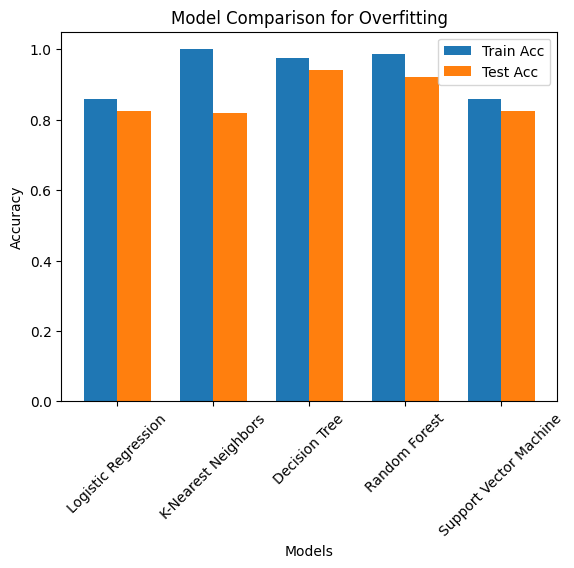

In [26]:
# Plotting training vs. testing accuracies
fig, ax = plt.subplots()
index = np.arange(len(results))
bar_width = 0.35

train_bars = ax.bar(index, [results[name][0]
                    for name in models.keys()], bar_width, label='Train Acc')
test_bars = ax.bar(index + bar_width, [results[name][1]
                   for name in models.keys()], bar_width, label='Test Acc')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison for Overfitting')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models.keys())
ax.legend()

plt.xticks(rotation=45)
plt.show()

In [27]:
X = patients_data.iloc[:, :-1]
Y = patients_data.iloc[:, -1]

# Split the dataset into the training set and the combined test/validation set
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.30, random_state=42)

# Split the combined test/validation set into testing set and validation set
X_test, X_val, Y_test, Y_val = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=42)

In [28]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(leaf_size=30, metric='manhattan', n_neighbors=10, p=1, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2),
    "Random Forest": RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=20, n_estimators=100)
}

In [29]:
# Train each model and predict on validation set
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(Y_val, Y_val_pred)
    report = classification_report(Y_val, Y_val_pred)
    conf_matrix = confusion_matrix(Y_val, Y_val_pred)
    results[name] = (accuracy, report, conf_matrix)

In [30]:
for name, (accuracy, report, conf_matrix) in results.items():
    print(f"{name} - Validation Accuracy: {accuracy:.2f}")
    print(f"{name} - Classification Report:\n{report}")
    print(f"{name} - Confusion Matrix:\n{conf_matrix}\n")

K-Nearest Neighbors - Validation Accuracy: 0.82
K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.99      0.90        96
        True       0.00      0.00      0.00        20

    accuracy                           0.82       116
   macro avg       0.41      0.49      0.45       116
weighted avg       0.68      0.82      0.75       116

K-Nearest Neighbors - Confusion Matrix:
[[95  1]
 [20  0]]

Decision Tree - Validation Accuracy: 0.96
Decision Tree - Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.95      0.97        96
        True       0.80      1.00      0.89        20

    accuracy                           0.96       116
   macro avg       0.90      0.97      0.93       116
weighted avg       0.97      0.96      0.96       116

Decision Tree - Confusion Matrix:
[[91  5]
 [ 0 20]]

Random Forest - Validation Accuracy: 0.94
Random Forest - 